# CP8318 Project

**Downloading Python Packages**

In [1]:
!pip install matplotlib
!pip install scikit-learn
!pip install skimage
!pip install pydicom
!pip install scipy
!pip install SimpleITK
!pip install pyradiomics
!pip install opencv-python
!pip install seaborn
!pip3 install torch torchvision
!pip install pywavelets

ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.
     |████████████████████████████████| 7.1MB 9.7MB/s 
     |████████████████████████████████| 42.5MB 51kB/s 
     |████████████████████████████████| 163kB 9.4MB/s 
     |████████████████████████████████| 40kB 5.8MB/s 
     |████████████████████████████████| 4.4MB 51.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: PyWavelets 1.1.1
    Uninstalling PyWavelets-1.1.1:
      Successfully uninstalled PyWavelets-1.1.1


Import Data

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
train_file_id = '1qnWrhC6wYmCpMWHvw3dGtR6nx2UWTNro'
test_file_id = '1YbDuj8VwiqQsQUG-OokdZ0RMV-E9IO3o'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


CSV Extraction/Formatting

In [321]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob
from pydicom.data import get_testdata_files
from skimage import exposure
import cv2
import pandas as pd
import os 

#Using Dataframes to load csv data
training_csv = pd.read_csv('/content/drive/Shared drives/CP8318 - Project/CSV/mass_case_description_train_set.csv')
testing_csv = pd.read_csv('/content/drive/Shared drives/CP8318 - Project/CSV/mass_case_description_test_set.csv')

#Get Labels
train_label = training_csv['pathology']
test_label = testing_csv['pathology']

new_train_label = []
new_test_label = []
names_train_label = []
names_test_label = []

training_img_path = training_csv['cropped image file path']
training_label_names = []

testing_img_path = testing_csv['cropped image file path']
testing_label_names = []

for i in range(len(train_label)):
  training_label_name = training_img_path[i]
  training_label_name = training_label_name.split('/', 1)
  training_label_name = training_label_name[0]+".dcm"
  training_label_names.append(training_label_name)

for i in range(len(test_label)):
  testing_label_name = testing_img_path[i]
  testing_label_name = testing_label_name.split('/', 1)
  testing_label_name = testing_label_name[0]+".dcm"
  testing_label_names.append(testing_label_name)
  
for i in range(len(train_label)):
  if train_label[i] == "MALIGNANT":
    new_train_label.append(0)
  elif train_label[i] == "BENIGN":
    new_train_label.append(1)
  else:
    new_train_label.append(1)

for i in range(len(test_label)):
  if test_label[i] == "MALIGNANT":
    new_test_label.append(0)
  elif test_label[i] == "BENIGN":
    new_test_label.append(1)
  else:
    new_test_label.append(1)

#Get Clinical Features
mass_shape_train_csv = training_csv['mass shape']
mass_shape_test_csv = testing_csv['mass shape']

mass_shape_train = []
mass_shape_test = []

for i in range(len(mass_shape_train_csv)):
  if mass_shape_train_csv[i] == "IRREGULAR-ARCHITECTURAL_DISTORTION":
    mass_shape_train.append(0)
  elif mass_shape_train_csv[i] == "ARCHITECTURAL_DISTORTION":
    mass_shape_train.append(1)
  elif mass_shape_train_csv[i] == "OVAL":
    mass_shape_train.append(2)
  elif mass_shape_train_csv[i] == "IRREGULAR":
    mass_shape_train.append(3)
  elif mass_shape_train_csv[i] == "LYMPH_NODE":
    mass_shape_train.append(4)
  elif mass_shape_train_csv[i] == "LOBULATED-LYMPH_NODE":
    mass_shape_train.append(5)
  elif mass_shape_train_csv[i] == "LOBULATED":
    mass_shape_train.append(6)
  elif mass_shape_train_csv[i] == "FOCAL_ASYMMETRIC_DENSITY":
    mass_shape_train.append(7)
  elif mass_shape_train_csv[i] == "ROUND":
    mass_shape_train.append(8)
  elif mass_shape_train_csv[i] == "LOBULATED-ARCHITECTURAL_DISTORTION":
    mass_shape_train.append(9)
  elif mass_shape_train_csv[i] == "ASYMMETRIC_BREAST_TISSUE":
    mass_shape_train.append(10)
  elif mass_shape_train_csv[i] == "LOBULATED-IRREGULAR":
    mass_shape_train.append(11)
  elif mass_shape_train_csv[i] == "N/A":
    mass_shape_train.append(12)
  elif mass_shape_train_csv[i] == "OVAL-LYMPH_NODE":
    mass_shape_train.append(13)
  elif mass_shape_train_csv[i] == "LOBULATED-OVAL":
    mass_shape_train.append(14)
  elif mass_shape_train_csv[i] == "ROUND-OVAL":
    mass_shape_train.append(15)
  elif mass_shape_train_csv[i] == "IRREGULAR-FOCAL_ASYMMETRIC_DENSITY":
    mass_shape_train.append(16)
  elif mass_shape_train_csv[i] == "ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION":
    mass_shape_train.append(17)
  elif mass_shape_train_csv[i] == "ROUND-LOBULATED":
    mass_shape_train.append(18)
  else: 
    mass_shape_train.append(19)

for i in range(len(mass_shape_test_csv)):
  if mass_shape_test_csv[i] == "IRREGULAR-ARCHITECTURAL_DISTORTION":
    mass_shape_test.append(0)
  elif mass_shape_test_csv[i] == "ARCHITECTURAL_DISTORTION":
    mass_shape_test.append(1)
  elif mass_shape_test_csv[i] == "OVAL":
    mass_shape_test.append(2)
  elif mass_shape_test_csv[i] == "IRREGULAR":
    mass_shape_test.append(3)
  elif mass_shape_test_csv[i] == "LYMPH_NODE":
    mass_shape_test.append(4)
  elif mass_shape_test_csv[i] == "LOBULATED-LYMPH_NODE":
    mass_shape_test.append(5)
  elif mass_shape_test_csv[i] == "LOBULATED":
    mass_shape_test.append(6)
  elif mass_shape_test_csv[i] == "FOCAL_ASYMMETRIC_DENSITY":
    mass_shape_test.append(7)
  elif mass_shape_test_csv[i] == "ROUND":
    mass_shape_test.append(8)
  elif mass_shape_test_csv[i] == "LOBULATED-ARCHITECTURAL_DISTORTION":
    mass_shape_test.append(9)
  elif mass_shape_test_csv[i] == "ASYMMETRIC_BREAST_TISSUE":
    mass_shape_test.append(10)
  elif mass_shape_test_csv[i] == "LOBULATED-IRREGULAR":
    mass_shape_test.append(11)
  elif mass_shape_test_csv[i] == "N/A":
    mass_shape_test.append(12)
  elif mass_shape_test_csv[i] == "OVAL-LYMPH_NODE":
    mass_shape_test.append(13)
  elif mass_shape_test_csv[i] == "OVAL-LOBULATED":
    mass_shape_test.append(14)
  elif mass_shape_test_csv[i] == "ROUND-OVAL":
    mass_shape_test.append(15)
  elif mass_shape_test_csv[i] == "IRREGULAR-FOCAL_ASYMMETRIC_DENSITY":
    mass_shape_test.append(16)
  elif mass_shape_test_csv[i] == "ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION":
    mass_shape_test.append(17)
  elif mass_shape_test_csv[i] == "ROUND-LOBULATED":
    mass_shape_test.append(18)
  else:
    mass_shape_test.append(19)
#get density feature
density_train_csv = np.array(training_csv['breast_density'])
density_test_csv = np.array(testing_csv['breast_density'])

# mass_shape_train = []
# mass_shape_test = []
# Check lengths of variables
print("Check lengths of labels:")
print("Original: ", len(train_label))
print("Numeric: ", len(new_train_label))
print("Original: ", len(test_label))
print("Numeric: ", len(new_test_label))


print("Check lengths of shape features:")
print("Original: ", len(mass_shape_train_csv))
print("Numeric: ", len(mass_shape_train))

print("Original: ", len(mass_shape_test_csv))
print("Numeric: ", len(mass_shape_test))

# new_train_label = np.array(new_train_label)
# new_test_label = np.array(new_test_label)
# print(len(np.where(new_train_label==0)[0]))
# print(len(np.where(new_train_label==1)[0]))
# print(len(np.where(new_test_label==0)[0]))
# print(len(np.where(new_test_label==1)[0]))

Check lengths of labels:
Original:  1318
Numeric:  1318
Original:  378
Numeric:  378
Check lengths of shape features:
Original:  1318
Numeric:  1318
Original:  378
Numeric:  378


In [322]:
# Mass Shape Dataframe Training
training_label_names_df = pd.DataFrame(list(zip(training_label_names, new_train_label, mass_shape_train,density_train_csv)),columns =['FileName','True_Train_Label','Mass_shape_train', 'Breast_density_train'])
training_label_names_df.head()

,FileName,True_Train_Label,Mass_shape_train,Breast_density_train
0,Mass-Training_P_00001_LEFT_CC_1.dcm,0,0,3
1,Mass-Training_P_00001_LEFT_MLO_1.dcm,0,0,3
2,Mass-Training_P_00004_LEFT_CC_1.dcm,1,1,3
3,Mass-Training_P_00004_LEFT_MLO_1.dcm,1,1,3
4,Mass-Training_P_00004_RIGHT_MLO_1.dcm,1,2,3


In [323]:
# Mass Shape Dataframe Testing
testing_label_names_df = pd.DataFrame(list(zip(testing_label_names,new_test_label, mass_shape_test, density_test_csv)),columns =['FileName','True_Test_Label','Mass_shape_test', 'Breast_density_test'])
testing_label_names_df.head()

,FileName,True_Test_Label,Mass_shape_test,Breast_density_test
0,Mass-Test_P_00016_LEFT_CC_1.dcm,0,3,4
1,Mass-Test_P_00016_LEFT_MLO_1.dcm,0,3,4
2,Mass-Test_P_00017_LEFT_CC_1.dcm,0,8,2
3,Mass-Test_P_00017_LEFT_MLO_1.dcm,0,8,2
4,Mass-Test_P_00032_RIGHT_CC_1.dcm,1,8,3


Main File

In [0]:
# Feature Extraction CSV
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob
from pydicom.data import get_testdata_files
from skimage import exposure
import cv2
import pandas as pd
import os 

#Using Dataframes to load csv data.

#Haar
haar_training_features_csv = pd.read_csv('/content/drive/Shared drives/CP8318 - Project/CSV/haar_train_set.csv')
haar_testing_features_csv = pd.read_csv('/content/drive/Shared drives/CP8318 - Project/CSV/haar_test_set.csv')

#Biorthogonal 1.3
bio_training_features_csv = pd.read_csv('/content/drive/Shared drives/CP8318 - Project/CSV/bio13_train_set.csv')
bio_testing_features_csv = pd.read_csv('/content/drive/Shared drives/CP8318 - Project/CSV/bio13_test_set.csv')

#Gabor
gab_training_features_csv = pd.read_csv('/content/drive/Shared drives/CP8318 - Project/CSV/gaborFeatures_train_set.csv')
gab_testing_features_csv = pd.read_csv('/content/drive/Shared drives/CP8318 - Project/CSV/gaborFeatures_test_set.csv')



Haar Wavelet CSVs

In [345]:
# Train Dataframe
empty = np.full(len(haar_training_features_csv), np.nan)


haar_training_features_csv.insert(1, "Train_Label", empty, True) 
haar_training_features_csv.insert(17, "Mass_shape_train", empty, True) 
haar_training_features_csv.insert(18, "Breast_density_train", empty, True)

# Comparing Label name to feature name

haar_training_features_csv['Breast_density_train']=haar_training_features_csv[['FileName']].merge(training_label_names_df,how='left').Breast_density_train
haar_training_features_csv['Mass_shape_train']=haar_training_features_csv[['FileName']].merge(training_label_names_df,how='left').Mass_shape_train
haar_training_features_csv['Train_Label']=haar_training_features_csv[['FileName']].merge(training_label_names_df,how='left').True_Train_Label

x_train = haar_training_features_csv.iloc[:,2:19]
y_train = haar_training_features_csv["Train_Label"]

# Train Set
x_train.head()


,cH_Contrast,cH_Correlation,cH_Energy,cH_Entropy,cH_Homogeneity,cV_Contrast,cV_Correlation,cV_Energy,cV_Entropy,cV_Homogeneity,cD_Contrast,cD_Correlation,cD_Energy,cD_Entropy,cD_Homogeneity,Mass_shape_train,Breast_density_train
0,1.086964,0.012462,0.150082,3.204612,0.674429,1.169989,0.002655,0.148205,3.299867,0.671948,1.737218,-0.070312,0.105872,3.766030,0.617455,0,3
1,1.629145,0.023701,0.109776,3.791719,0.634595,1.590333,-0.002201,0.117231,3.709536,0.638788,2.004078,-0.080293,0.087863,3.951633,0.595102,0,3
2,1.087852,0.073111,0.163627,3.248945,0.697220,0.752179,0.155506,0.186249,2.880680,0.727455,1.463786,-0.065944,0.144459,3.463020,0.657724,1,3
3,0.989631,0.084611,0.204401,3.079978,0.727492,0.396077,0.112934,0.412951,1.930959,0.832687,1.259232,-0.066343,0.154500,3.280499,0.672789,1,3
4,1.023968,0.118231,0.172295,3.186158,0.705474,1.007693,0.139984,0.156649,3.257612,0.698164,1.197902,-0.045242,0.183544,3.152051,0.689856,2,3


In [346]:
# Test Dataframe
empty = np.full(len(haar_testing_features_csv), np.nan)


haar_testing_features_csv.insert(1, "Test_Label", empty, True) 
haar_testing_features_csv.insert(17, "Mass_shape_test", empty, True) 
haar_testing_features_csv.insert(18, "Breast_density_test", empty, True) 

# Comparing Label name to feature name

haar_testing_features_csv['Mass_shape_test']=haar_testing_features_csv[['FileName']].merge(testing_label_names_df,how='left').Mass_shape_test
haar_testing_features_csv['Test_Label']=haar_testing_features_csv[['FileName']].merge(testing_label_names_df,how='left').True_Test_Label
haar_testing_features_csv['Breast_density_test']=haar_testing_features_csv[['FileName']].merge(testing_label_names_df,how='left').Breast_density_test

x_test = haar_testing_features_csv.iloc[:,2:19]
y_test = haar_testing_features_csv["Test_Label"]

# Test Set
x_test.head()

,cH_Contrast,cH_Correlation,cH_Energy,cH_Entropy,cH_Homogeneity,cV_Contrast,cV_Correlation,cV_Energy,cV_Entropy,cV_Homogeneity,cD_Contrast,cD_Correlation,cD_Energy,cD_Entropy,cD_Homogeneity,Mass_shape_test,Breast_density_test
0,1.020555,0.128728,0.148765,3.262567,0.694553,0.652938,0.144429,0.223711,2.624621,0.749517,2.043646,-0.040337,0.091998,3.970347,0.601537,3,4
1,0.632519,0.107529,0.224010,2.536951,0.745882,1.058970,0.132243,0.147777,3.312531,0.689074,1.478971,-0.043858,0.132133,3.540128,0.651649,3,4
2,1.668790,0.000383,0.114048,3.761521,0.634484,1.765421,-0.002600,0.119913,3.789847,0.638897,1.279940,-0.063180,0.147924,3.303997,0.661285,8,2
3,1.608801,0.004700,0.115304,3.724995,0.639514,1.262291,-0.012013,0.142964,3.363214,0.665463,0.817714,-0.060748,0.263950,2.649186,0.748019,8,2
4,1.135541,0.053981,0.158911,3.259559,0.688915,1.606427,0.076689,0.128295,3.748902,0.658165,1.171140,-0.048840,0.191403,3.090855,0.695815,8,3


BIO1.3 Wavelet CSV

In [333]:
# Train Dataframe
empty = np.full(len(bio_training_features_csv), np.nan)


bio_training_features_csv.insert(1, "Train_Label", empty, True) 
bio_training_features_csv.insert(17, "Mass_shape_train", empty, True) 
bio_training_features_csv.insert(18, "Breast_density_train", empty, True)

# Comparing Label name to feature name

bio_training_features_csv['Breast_density_train']=bio_training_features_csv[['FileName']].merge(training_label_names_df,how='left').Breast_density_train
bio_training_features_csv['Mass_shape_train']=bio_training_features_csv[['FileName']].merge(training_label_names_df,how='left').Mass_shape_train
bio_training_features_csv['Train_Label']=bio_training_features_csv[['FileName']].merge(training_label_names_df,how='left').True_Train_Label

x_train = bio_training_features_csv.iloc[:,2:19]
y_train = bio_training_features_csv["Train_Label"]

# Train Set
x_train.head()


,cH_Contrast,cH_Correlation,cH_Energy,cH_Entropy,cH_Homogeneity,cV_Contrast,cV_Correlation,cV_Energy,cV_Entropy,cV_Homogeneity,cD_Contrast,cD_Correlation,cD_Energy,cD_Entropy,cD_Homogeneity,Mass_shape_train,Breast_density_train
0,1.173531,0.006151,0.140102,3.311430,0.664340,1.180578,-0.002088,0.148212,3.306158,0.670682,1.737218,-0.070312,0.105872,3.766030,0.617455,0,3
1,1.634642,0.018083,0.110400,3.790310,0.634715,1.661569,-0.007238,0.107412,3.782128,0.628952,2.004078,-0.080293,0.087863,3.951633,0.595102,0,3
2,1.074694,0.065929,0.167998,3.221520,0.699238,0.706793,0.146939,0.218193,2.767410,0.744963,1.463786,-0.065944,0.144459,3.463020,0.657724,1,3
3,1.019784,0.077932,0.194232,3.123375,0.720424,0.386602,0.101238,0.427192,1.889952,0.836425,1.259232,-0.066343,0.154500,3.280499,0.672789,1,3
4,1.101449,0.111032,0.161244,3.297428,0.695831,0.931695,0.125758,0.170359,3.128163,0.707464,1.197902,-0.045242,0.183544,3.152051,0.689856,2,3


In [334]:
# Test Dataframe
empty = np.full(len(bio_testing_features_csv), np.nan)


bio_testing_features_csv.insert(1, "Test_Label", empty, True) 
bio_testing_features_csv.insert(17, "Mass_shape_test", empty, True) 
bio_testing_features_csv.insert(18, "Breast_density_test", empty, True) 

# Comparing Label name to feature name

bio_testing_features_csv['Mass_shape_test']=bio_testing_features_csv[['FileName']].merge(testing_label_names_df,how='left').Mass_shape_test
bio_testing_features_csv['Test_Label']=bio_testing_features_csv[['FileName']].merge(testing_label_names_df,how='left').True_Test_Label
bio_testing_features_csv['Breast_density_test']=bio_testing_features_csv[['FileName']].merge(testing_label_names_df,how='left').Breast_density_test

x_test = bio_testing_features_csv.iloc[:,2:19]
y_test = bio_testing_features_csv["Test_Label"]

# Test Set
x_test.head()

,cH_Contrast,cH_Correlation,cH_Energy,cH_Entropy,cH_Homogeneity,cV_Contrast,cV_Correlation,cV_Energy,cV_Entropy,cV_Homogeneity,cD_Contrast,cD_Correlation,cD_Energy,cD_Entropy,cD_Homogeneity,Mass_shape_test,Breast_density_test
0,0.968760,0.121963,0.158681,3.177942,0.701615,0.640075,0.130760,0.220192,2.594506,0.748800,2.043646,-0.040337,0.091998,3.970347,0.601537,3,4
1,0.645573,0.104407,0.220939,2.565626,0.743494,1.047589,0.127220,0.153846,3.281726,0.691969,1.478971,-0.043858,0.132133,3.540128,0.651649,3,4
2,1.497262,-0.005520,0.130073,3.584649,0.650922,1.863456,-0.003581,0.105277,3.904346,0.625146,1.279940,-0.063180,0.147924,3.303997,0.661285,8,2
3,1.582785,0.000635,0.121241,3.685937,0.645660,1.230487,-0.012981,0.149163,3.315641,0.669638,0.817714,-0.060748,0.263950,2.649186,0.748019,8,2
4,1.175589,0.050247,0.152040,3.316143,0.683143,1.499113,0.067617,0.128853,3.675344,0.662270,1.171140,-0.048840,0.191403,3.090855,0.695815,8,3


Gabor CSVs

In [351]:
# Train Dataframe
empty = np.full(len(gab_training_features_csv), np.nan)


gab_training_features_csv.insert(1, "Train_Label", empty, True) 
gab_training_features_csv.insert(7, "Mass_shape_train", empty, True) 
gab_training_features_csv.insert(7, "Breast_density_train", empty, True)

# Comparing Label name to feature name

gab_training_features_csv['Breast_density_train']=gab_training_features_csv[['FileName']].merge(training_label_names_df,how='left').Breast_density_train
gab_training_features_csv['Mass_shape_train']=gab_training_features_csv[['FileName']].merge(training_label_names_df,how='left').Mass_shape_train
gab_training_features_csv['Train_Label']=gab_training_features_csv[['FileName']].merge(training_label_names_df,how='left').True_Train_Label

x_train = gab_training_features_csv.iloc[:,2:9]
y_train = gab_training_features_csv["Train_Label"]

# Train Set
x_train.head()



,Contrast,Correlation,Energy,Entropy,Homogeneity,Breast_density_train,Mass_shape_train
0,0.119041,0.919344,0.275840,2.419681,0.940484,3,0
1,0.170060,0.934123,0.181728,3.023301,0.914979,3,0
2,0.116538,0.958092,0.188739,2.881857,0.941731,3,1
3,0.108481,0.964678,0.182407,2.903649,0.945759,3,1
4,0.131654,0.947776,0.200370,2.834158,0.934173,3,2


In [352]:
# Test Dataframe
empty = np.full(len(gab_testing_features_csv), np.nan)


gab_testing_features_csv.insert(1, "Test_Label", empty, True) 
gab_testing_features_csv.insert(7, "Mass_shape_test", empty, True) 
gab_testing_features_csv.insert(7, "Breast_density_test", empty, True) 

# Comparing Label name to feature name

gab_testing_features_csv['Mass_shape_test']=gab_testing_features_csv[['FileName']].merge(testing_label_names_df,how='left').Mass_shape_test
gab_testing_features_csv['Test_Label']=gab_testing_features_csv[['FileName']].merge(testing_label_names_df,how='left').True_Test_Label
gab_testing_features_csv['Breast_density_test']=gab_testing_features_csv[['FileName']].merge(testing_label_names_df,how='left').Breast_density_test

x_test = gab_testing_features_csv.iloc[:,2:9]
y_test = gab_testing_features_csv["Test_Label"]

# Test Set
x_test.head()

,Contrast,Correlation,Energy,Entropy,Homogeneity,Breast_density_test,Mass_shape_test
0,0.102955,0.939851,0.286298,2.376200,0.948523,4,3
1,0.079095,0.954995,0.280506,2.327558,0.960452,4,3
2,0.142428,0.967066,0.144734,3.231605,0.928786,2,8
3,0.127339,0.967254,0.153472,3.138315,0.936331,2,8
4,0.119729,0.970845,0.150993,3.123449,0.940135,3,8


Data Normalization

In [353]:
# Train Set Normalization
from scipy.stats import zscore

x_train = x_train.apply(zscore)
x_train.head()

,Contrast,Correlation,Energy,Entropy,Homogeneity,Breast_density_train,Mass_shape_train
0,0.063756,-1.662095,0.515560,-0.597753,-0.063792,0.912094,-1.490050
1,1.704358,-0.902583,-0.412734,0.549064,-1.704827,0.912094,-1.490050
2,-0.016753,0.329237,-0.343579,0.280335,0.016461,0.912094,-1.125963
3,-0.275826,0.667671,-0.406035,0.321737,0.275648,0.912094,-1.125963
4,0.469353,-0.200954,-0.228851,0.189712,-0.469858,0.912094,-0.761876


In [354]:
# Test Set Normaization

x_test = x_test.apply(zscore)

x_test.head()

,Contrast,Correlation,Energy,Entropy,Homogeneity,Breast_density_test,Mass_shape_test
0,-0.444326,-0.518015,0.623616,-0.660965,0.444244,1.873902,-0.416008
1,-1.280230,0.213857,0.563978,-0.755841,1.280378,1.873902,-0.416008
2,0.938583,0.797270,-0.833847,1.007520,-0.939044,-0.455983,1.573364
3,0.409945,0.806361,-0.743883,0.825555,-0.410261,-0.455983,1.573364
4,0.143355,0.979887,-0.769413,0.796560,-0.143598,0.708960,1.573364


Correlation Heatmap

Breast_density_train


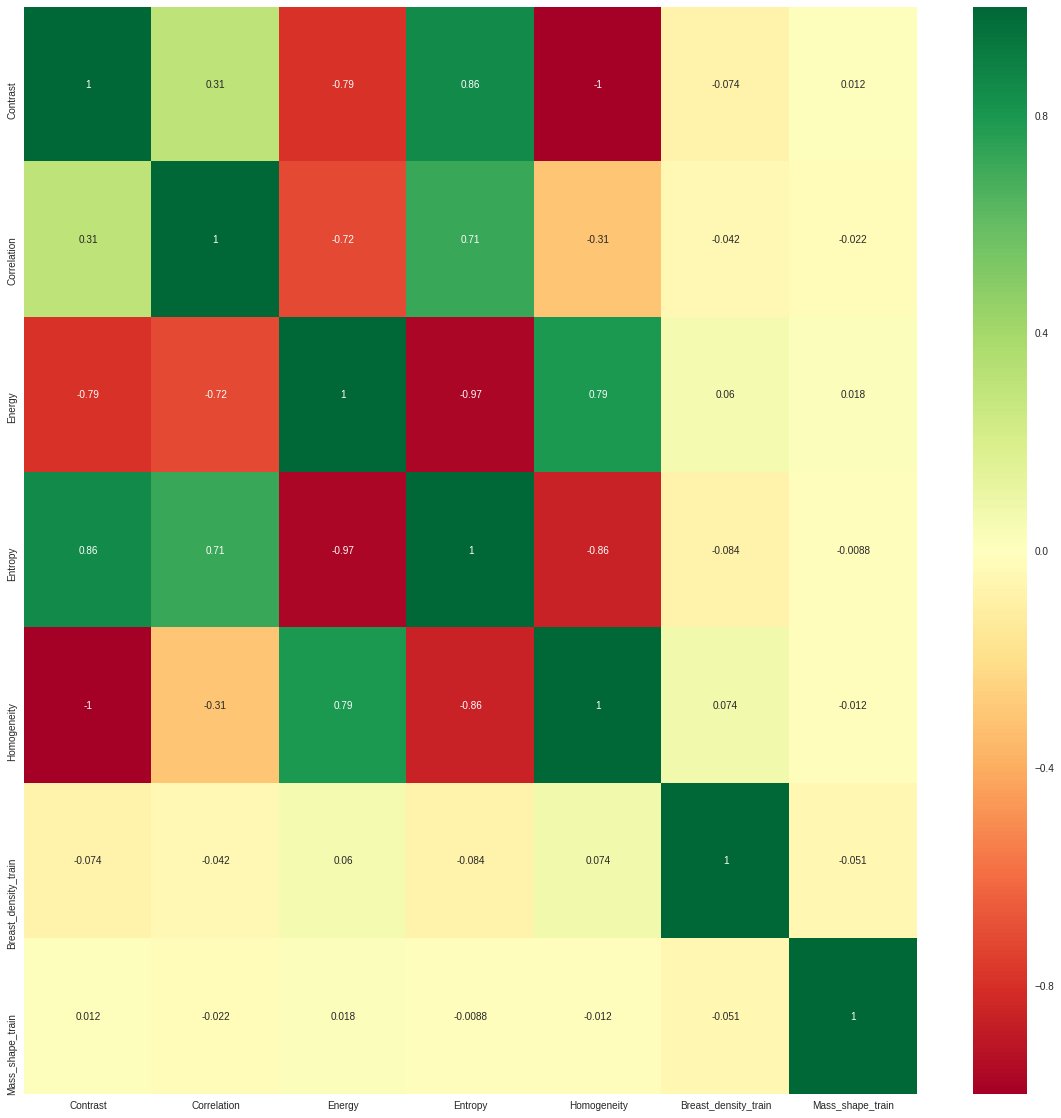

In [286]:
import pandas as pd
import numpy as np
import seaborn as sns

corrmat = x_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(x_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
print (min(x_train[top_corr_features].corr()))

Feature Importance

[0.1359142  0.1452082  0.14003732 0.14073717 0.13618914 0.07109372
 0.23082027]


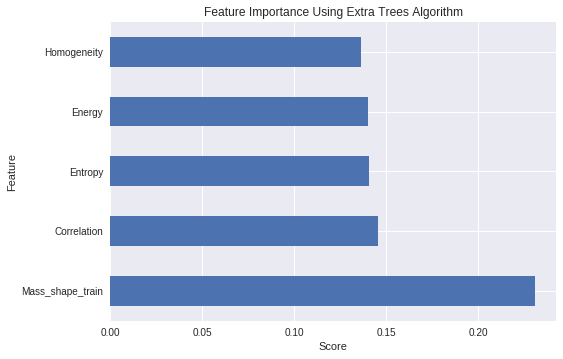

In [287]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier(n_estimators = 1000)
model.fit(x_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance Using Extra Trees Algorithm")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.show()

Principal Component Analysis

In [335]:
from sklearn.decomposition import PCA


model = PCA(n_components=.95).fit(x_train)
X_pc = model.transform(x_train)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['cH_Contrast','cH_Correlation','cH_Energy','cH_Entropy','cH_Homogeneity', 'cV_Contrast','cV_Correlation','cV_Energy','cV_Entropy','cV_Homogeneity', 'cD_Contrast','cD_Correlation','cD_Energy','cD_Entropy','cD_Homogeneity', 'Mass_shape_train','Breast_density_train']

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

df.head(20)

,0,1
0,PC1,Mass_shape_train
1,PC2,cV_Entropy
2,PC3,Breast_density_train


Number of Dimensions in Train using PCA = 7


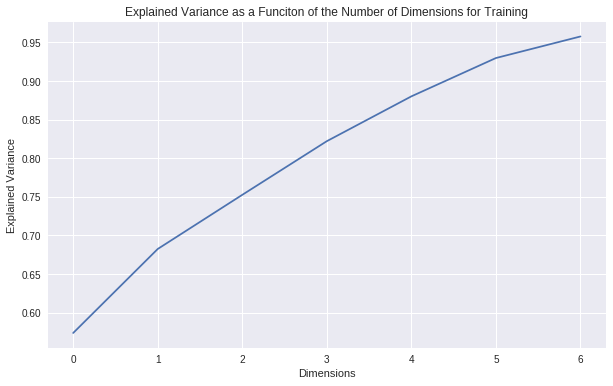

Number of Dimensions in Test using PCA = 7


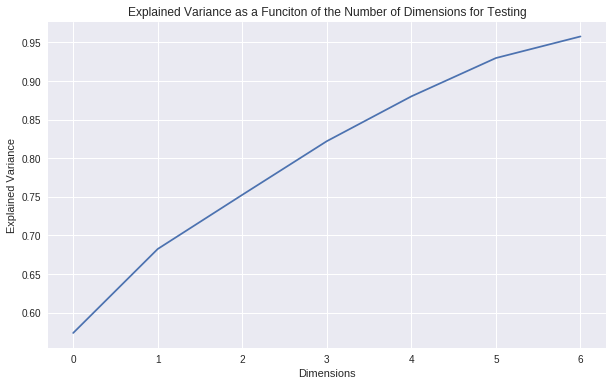

In [349]:
# Training Data
from sklearn.decomposition import PCA

pca = PCA(n_components = .95) #Choose the number dimensions to add up to 95% of the variance

# Training Data
X_train_reduced = pca.fit_transform(x_train)

print('Number of Dimensions in Train using PCA = %d' %(X_train_reduced.shape[1]))

# Explained Variance Ratio
cum_var_train = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (10,6))
plt.plot(cum_var_train)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.title('Explained Variance as a Funciton of the Number of Dimensions for Training')
plt.show()

# Testing Data
X_test_reduced = pca.transform(x_test)

print('Number of Dimensions in Test using PCA = %d' %(X_test_reduced.shape[1]))
# Explained Variance Ratio
cum_var_test = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (10,6))
plt.plot(cum_var_train)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.title('Explained Variance as a Funciton of the Number of Dimensions for Testing')
plt.show()

Feature Pruning Training Set

In [0]:
#1) Using Feature Importance
#Selected 5 most important features
#'cV_Homogeneity', 'cV_Correlation', 'cD_Correlation','cD_Energy','Mass_shape_train'

# #For Wavelet
# x_train_FI = x_train[['cV_Homogeneity', 'cV_Correlation', 'cD_Correlation','cD_Energy','Mass_shape_train']]
# x_test_FI = x_test[['cV_Homogeneity', 'cV_Correlation', 'cD_Correlation','cD_Energy','Mass_shape_test']]

#For Gabor
x_train_FI = x_train[['Homogeneity', 'Correlation','Energy','Entropy','Mass_shape_train']]
x_test_FI = x_test[['Homogeneity', 'Correlation','Energy','Entropy','Mass_shape_test']]


In [0]:
#2) Using PCA 
#cH_Entropy, cD_Energy,	cH_Energy, Mass_shape_test, cV_Correlation

#For wavelet
# x_train_PCA = x_train[['cH_Entropy', 'cD_Energy', 'cH_Energy','cH_Correlation', 'cV_Correlation','cD_Correlation','Mass_shape_train','Breast_density_train']]
# x_test_PCA = x_test[['cH_Entropy', 'cD_Energy', 'cH_Energy','cH_Correlation', 'cV_Correlation','cD_Correlation','Mass_shape_test','Breast_density_test']]
#For Gabor
x_train_PCA = x_train[['Entropy', 'Energy', 'Correlation','Mass_shape_train','Breast_density_train']]
x_test_PCA = x_test[['Entropy', 'Energy', 'Correlation','Mass_shape_test','Breast_density_test']]


In [0]:
#3) Correlation Based 
# x_train_corr = x_train[['cD_Homogeneity', 'cV_Correlation','Mass_shape_train','Breast_density_train']]
# x_test_corr = x_test[['cD_Homogeneity', 'cV_Correlation','Mass_shape_test','Breast_density_test']]
# #Gabor
x_train_corr = x_train[['Contrast', 'Entropy','Mass_shape_train','Breast_density_train']]
x_test_corr = x_test[['Contrast', 'Entropy','Mass_shape_test','Breast_density_test']]

In [0]:
#4) Clinical Features Only
x_train_clinical = x_train[['Mass_shape_train','Breast_density_train']]
x_test_clinical = x_test[['Mass_shape_test','Breast_density_test']]

Classification

In [358]:
# Classification Feature Importance NNET

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Initialize default model
nnet = MLPClassifier()
# nnet_FI = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(x_train_FI.shape[1]), max_iter=10000, activation='logistic')
# print("\033[1m" + "FI: Model Configuration" + "\033[0;0m")
# print("***********************")
# print(nnet_FI)

# Cross Validation for Model Selection using Exhaustive Grid Search
param_grid = [
  #Original - logistic as base
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_FI.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  #Changing iterations
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_FI.shape[1]], 'max_iter':[10000], 'activation':['logistic']},
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_FI.shape[1]], 'max_iter':[5000], 'activation':['logistic']},
  #Changing activation
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_FI.shape[1]], 'max_iter':[1000], 'activation':['tanh']},
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_FI.shape[1]], 'max_iter':[1000], 'activation':['relu']},
  #Changing solver
  {'solver': ['sgd'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_FI.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  {'solver': ['adam'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_FI.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  #Changing # of layers
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_FI.shape[1], x_train_FI.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_FI.shape[1], x_train_FI.shape[1], x_train_FI.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  #Changing # of units
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_FI.shape[1]*2], 'max_iter':[1000], 'activation':['logistic']},
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [round(x_train_FI.shape[1]/2)], 'max_iter':[1000], 'activation':['logistic']},
  #Changing # of units and layers
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_FI.shape[1]*2, x_train_FI.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_FI.shape[1], round(x_train_FI.shape[1]/2), round(x_train_FI.shape[1]/4)], 'max_iter':[1000], 'activation':['logistic']},
  #Changing regularization
  {'solver': ['lbfgs'], 'alpha': [0.01], 'hidden_layer_sizes': [x_train_FI.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  {'solver': ['lbfgs'], 'alpha': [0.001], 'hidden_layer_sizes': [x_train_FI.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
 ]

# Perform Grid Search - using default 5 fold cross validation
searchCLF = GridSearchCV(nnet, param_grid, cv=5)
nnet_FI = MLPClassifier(solver= 'lbfgs', alpha=0.01, hidden_layer_sizes=x_train_FI.shape[1], max_iter=1000, activation='logistic' )
#Train grid 
# searchCLF.fit(x_train_FI, y_train)
train_scores = []
test_scores = []
for i in range(5):
  nnet_FI.fit(x_train_FI, y_train)
  #Get best parameters 
  # params = searchCLF.best_params_

  # print(params)
  # print(searchCLF.best_score_)

  # Predict with best model
  # pred_y_test = searchCLF.predict(x_test_FI)
  pred_y_test = nnet_FI.predict(x_test_FI)
  print("\033[1m" + "Training and Test Accuracy" + "\033[0;0m")
  print("*****************************")
  # print("Training set score: %f" % searchCLF.score(x_train_FI, y_train))
  # print("Test set score: %f" % searchCLF.score(x_test_FI, y_test))
  print("Training set score: %f" % nnet_FI.score(x_train_FI, y_train))
  print("Test set score: %f" % nnet_FI.score(x_test_FI, y_test))
  train_scores.append(nnet_FI.score(x_train_FI, y_train))
  test_scores.append(nnet_FI.score(x_test_FI, y_test))

test_scores = np.array(test_scores)
train_scores = np.array(train_scores)
print("*********************")
print("Training:", train_scores.mean())
print("Testing:", test_scores.mean())

print("\033[1m" + "Classification Report" + "\033[0;0m")
print("*********************")
print(classification_report(y_test,pred_y_test))



Training and Test Accuracy
*****************************
Training set score: 0.742792
Test set score: 0.750670
Training and Test Accuracy
*****************************
Training set score: 0.743551
Test set score: 0.747989
Training and Test Accuracy
*****************************
Training set score: 0.740516
Test set score: 0.721180
Training and Test Accuracy
*****************************
Training set score: 0.738998
Test set score: 0.756032
Training and Test Accuracy
*****************************
Training set score: 0.744310
Test set score: 0.753351
*********************
Training: 0.7420333839150227
Testing: 0.7458445040214476
Classification Report
*********************
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       147
           1       0.79      0.81      0.80       226

    accuracy                           0.75       373
   macro avg       0.74      0.74      0.74       373
weighted avg       0.75      0.75      0.75       

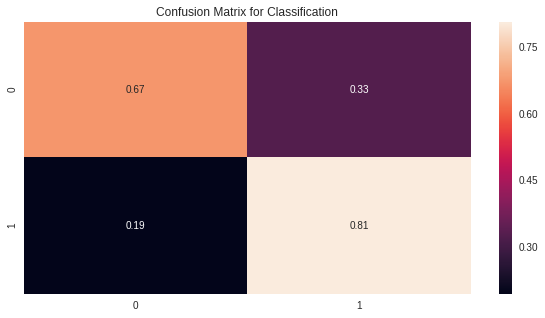

In [359]:
import seaborn as sn
cmLR = confusion_matrix(y_test, pred_y_test)
cmLR = cmLR.astype('float') / cmLR.sum(axis=1)[:, np.newaxis]

df_cmLR = pd.DataFrame(cmLR)

plt.figure(figsize = (10,5))
plt.title("Confusion Matrix for Classification")
sn.heatmap(df_cmLR, annot=True)
plt.show()

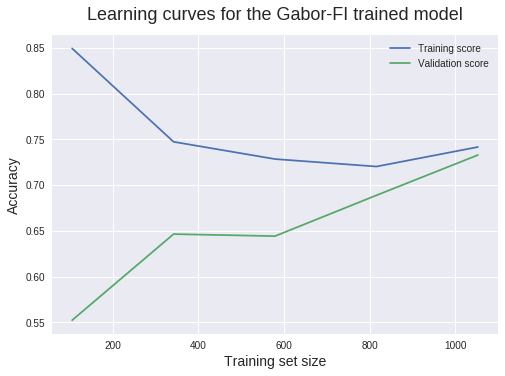

In [360]:
#Plot Loss Curves
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(estimator = nnet_FI, X = x_train_FI, y = y_train, cv = 5, scoring = 'accuracy')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for the Gabor-FI trained model', fontsize = 18, y = 1.03)
plt.legend()

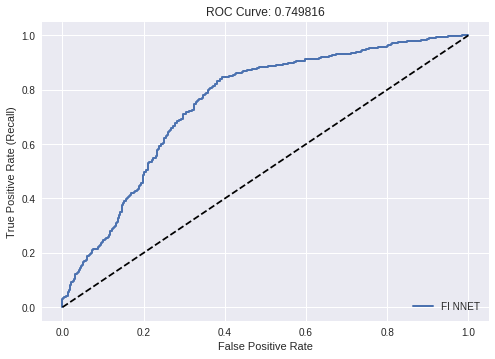

In [361]:
# Plot ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

y_train_prob_FI = cross_val_predict(nnet_FI, x_train_FI, y_train, cv = 10, method = "predict_proba")
y_train_scores_FI = y_train_prob_FI[:,1]
fpr, tpr, thresholds = roc_curve(y_train,y_train_scores_FI)

# Area Under the Curve
roc_auc = roc_auc_score(y_train, y_train_scores_FI)

def plot_roc_curve(fpr, tpr, label):
  plt.plot(fpr, tpr, linewidth = 2, label = label)
  plt.plot([0,1], [0,1], 'k--') #Dashed Diagonal
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate (Recall)")
  plt.title("ROC Curve: %f" % roc_auc)

plot_roc_curve(fpr, tpr, "FI NNET")
plt.legend(loc = "lower right")
plt.show()


In [362]:
#Classification Using PCA1

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Initialize default model
nnet = MLPClassifier()
# nnet_FI = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(x_train_FI.shape[1]), max_iter=10000, activation='logistic')
# print("\033[1m" + "FI: Model Configuration" + "\033[0;0m")
# print("***********************")
# print(nnet_FI)

# Cross Validation for Model Selection using Exhaustive Grid Search
param_grid = [
  #Original - logistic as base
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_PCA.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  #Changing iterations
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_PCA.shape[1]], 'max_iter':[10000], 'activation':['logistic']},
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_PCA.shape[1]], 'max_iter':[5000], 'activation':['logistic']},
  #Changing activation
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_PCA.shape[1]], 'max_iter':[1000], 'activation':['tanh']},
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_PCA.shape[1]], 'max_iter':[1000], 'activation':['relu']},
  #Changing solver
  {'solver': ['sgd'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_PCA.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  {'solver': ['adam'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_PCA.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  #Changing # of layers
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_PCA.shape[1], x_train_PCA.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_PCA.shape[1], x_train_PCA.shape[1], x_train_PCA.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
   #Changing # of units
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_PCA.shape[1]*2], 'max_iter':[1000], 'activation':['logistic']},
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [round(x_train_PCA.shape[1]/2)], 'max_iter':[1000], 'activation':['logistic']},
  #Changing # of units and layers
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_PCA.shape[1]*2, x_train_PCA.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_PCA.shape[1], round(x_train_PCA.shape[1]/2), round(x_train_PCA.shape[1]/4)], 'max_iter':[1000], 'activation':['logistic']},
  #Changing regularization
  {'solver': ['lbfgs'], 'alpha': [0.01], 'hidden_layer_sizes': [x_train_PCA.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  {'solver': ['lbfgs'], 'alpha': [0.001], 'hidden_layer_sizes': [x_train_PCA.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
 ]

# Perform Grid Search - using default 5 fold cross validation
searchCLF = GridSearchCV(nnet, param_grid, cv=5)

#Optimized MLP Params
nnet_PCA = MLPClassifier(solver= 'lbfgs', alpha=0.001, hidden_layer_sizes=x_train_PCA.shape[1], max_iter=1000, activation='logistic' )

#Train grid 
# searchCLF.fit(x_train_PCA, y_train)
train_scores = []
test_scores = []
for i in range(5):
  nnet_PCA.fit(x_train_PCA, y_train)

  # #Get best parameters 
  # params = searchCLF.best_params_

  # print(params)
  # print(searchCLF.best_score_)

  # Predict with best model
  # pred_y_test = searchCLF.predict(x_test_FI)
  pred_y_test = nnet_PCA.predict(x_test_PCA)
  print("\033[1m" + "Training and Test Accuracy" + "\033[0;0m")
  print("*****************************")
  # print("Training set score: %f" % searchCLF.score(x_train_FI, y_train))
  # print("Test set score: %f" % searchCLF.score(x_test_FI, y_test))
  print("Training set score: %f" % nnet_PCA.score(x_train_PCA, y_train))
  print("Test set score: %f" % nnet_PCA.score(x_test_PCA, y_test))

  train_scores.append(nnet_PCA.score(x_train_PCA, y_train))
  test_scores.append(nnet_PCA.score(x_test_PCA, y_test))

test_scores = np.array(test_scores)
train_scores = np.array(train_scores)
print("*********************")
print("Training:", train_scores.mean())
print("Testing:", test_scores.mean())
print("\033[1m" + "Classification Report" + "\033[0;0m")
print("*********************")
print(classification_report(y_test,pred_y_test))


Training and Test Accuracy
*****************************
Training set score: 0.668437
Test set score: 0.471850
Training and Test Accuracy
*****************************
Training set score: 0.684370
Test set score: 0.560322
Training and Test Accuracy
*****************************
Training set score: 0.746586
Test set score: 0.745308
Training and Test Accuracy
*****************************
Training set score: 0.747344
Test set score: 0.726542
Training and Test Accuracy
*****************************
Training set score: 0.726859
Test set score: 0.689008
*********************
Training: 0.7147192716236722
Testing: 0.6386058981233245
Classification Report
*********************
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       147
           1       0.74      0.76      0.75       226

    accuracy                           0.69       373
   macro avg       0.67      0.67      0.67       373
weighted avg       0.69      0.69      0.69       

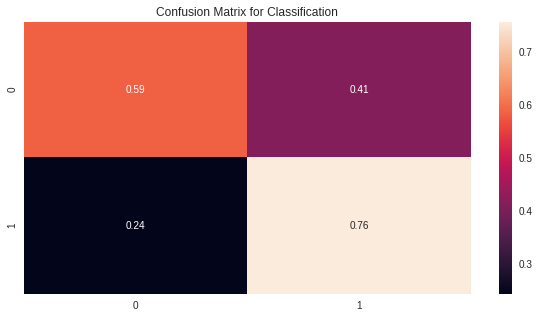

In [363]:
import seaborn as sn
cmLR = confusion_matrix(y_test, pred_y_test)
cmLR = cmLR.astype('float') / cmLR.sum(axis=1)[:, np.newaxis]

df_cmLR = pd.DataFrame(cmLR)

plt.figure(figsize = (10,5))
plt.title("Confusion Matrix for Classification")
sn.heatmap(df_cmLR, annot=True)
plt.show()

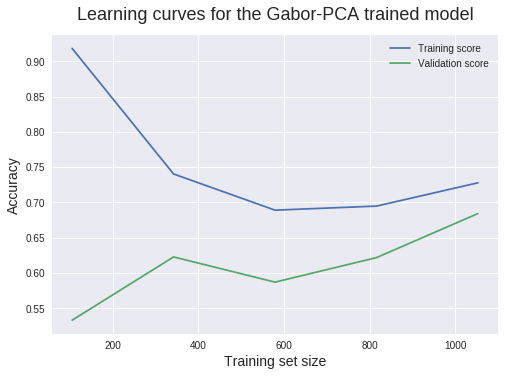

In [364]:
#Plot Loss Curves
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(estimator = nnet_PCA, X = x_train_PCA, y = y_train, cv = 5, scoring = 'accuracy')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for the Gabor-PCA trained model', fontsize = 18, y = 1.03)
plt.legend()

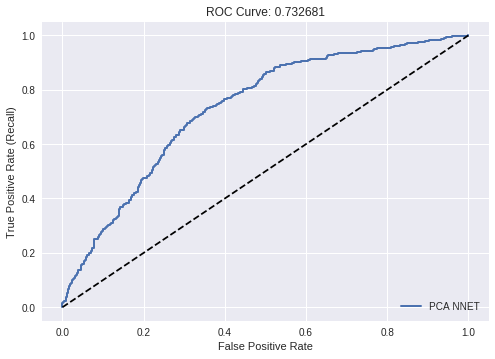

In [365]:
# Plot ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

y_train_prob_PCA = cross_val_predict(nnet_PCA, x_train_PCA, y_train, cv = 10, method = "predict_proba")
y_train_scores_PCA = y_train_prob_PCA[:,1]
fpr, tpr, thresholds = roc_curve(y_train,y_train_scores_PCA)

# Area Under the Curve
roc_auc = roc_auc_score(y_train, y_train_scores_PCA)

def plot_roc_curve(fpr, tpr, label):
  plt.plot(fpr, tpr, linewidth = 2, label = label)
  plt.plot([0,1], [0,1], 'k--') #Dashed Diagonal
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate (Recall)")
  plt.title("ROC Curve: %f" % roc_auc)

plot_roc_curve(fpr, tpr, "PCA NNET")
plt.legend(loc = "lower right")
plt.show()

In [367]:
#Classification using Corr Features
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Initialize default model
nnet = MLPClassifier()
# nnet_FI = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(x_train_FI.shape[1]), max_iter=10000, activation='logistic')
# print("\033[1m" + "FI: Model Configuration" + "\033[0;0m")
# print("***********************")
# print(nnet_FI)

# Cross Validation for Model Selection using Exhaustive Grid Search
param_grid = [
  #Original - logistic as base
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_corr.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  #Changing iterations
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_corr.shape[1]], 'max_iter':[10000], 'activation':['logistic']},
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_corr.shape[1]], 'max_iter':[5000], 'activation':['logistic']},
  #Changing activation
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_corr.shape[1]], 'max_iter':[1000], 'activation':['tanh']},
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_corr.shape[1]], 'max_iter':[1000], 'activation':['relu']},
  #Changing solver
  {'solver': ['sgd'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_corr.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  {'solver': ['adam'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_corr.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  #Changing # of layers
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_corr.shape[1], x_train_corr.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_corr.shape[1], x_train_corr.shape[1], x_train_corr.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
   #Changing # of units
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_corr.shape[1]*2], 'max_iter':[1000], 'activation':['logistic']},
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [round(x_train_corr.shape[1]/2)], 'max_iter':[1000], 'activation':['logistic']},
  #Changing # of units and layers
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_corr.shape[1]*2, x_train_corr.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  {'solver': ['lbfgs'], 'alpha': [1e-5], 'hidden_layer_sizes': [x_train_corr.shape[1], round(x_train_corr.shape[1]/2), round(x_train_corr.shape[1]/4)], 'max_iter':[1000], 'activation':['logistic']},
  #Changing regularization
  {'solver': ['lbfgs'], 'alpha': [0.01], 'hidden_layer_sizes': [x_train_corr.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
  {'solver': ['lbfgs'], 'alpha': [0.001], 'hidden_layer_sizes': [x_train_corr.shape[1]], 'max_iter':[1000], 'activation':['logistic']},
 ]


# Perform Grid Search - using default 5 fold cross validation
searchCLF = GridSearchCV(nnet, param_grid, cv=5)

nnet_Corr = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(x_train_corr.shape[1]), max_iter=1000, activation='logistic')
#Train grid 
#searchCLF.fit(x_train_corr, y_train)

train_scores = []
test_scores = []
for i in range(5):
  nnet_Corr.fit(x_train_corr, y_train)

  # #Get best parameters 
  # params = searchCLF.best_params_

  # print(params)
  # print(searchCLF.best_score_)

  # Predict with best model
  # pred_y_test = searchCLF.predict(x_test_FI)
  pred_y_test = nnet_Corr.predict(x_test_corr)
  print("\033[1m" + "Training and Test Accuracy" + "\033[0;0m")
  print("*****************************")
  # print("Training set score: %f" % searchCLF.score(x_train_FI, y_train))
  # print("Test set score: %f" % searchCLF.score(x_test_FI, y_test))
  print("Training set score: %f" % nnet_Corr.score(x_train_corr, y_train))
  print("Test set score: %f" % nnet_Corr.score(x_test_corr, y_test))

  train_scores.append(nnet_Corr.score(x_train_corr, y_train))
  test_scores.append(nnet_Corr.score(x_test_corr, y_test))

test_scores = np.array(test_scores)
train_scores = np.array(train_scores)
print("*********************")
print("Training:", train_scores.mean())
print("Testing:", test_scores.mean())

#Get best parameters 
#params = searchCLF.best_params_

#print(params)
#print(searchCLF.best_score_)

# Predict with best model
# pred_y_test = searchCLF.predict(x_test_corr)
pred_y_test = nnet_Corr.predict(x_test_corr)
print("\033[1m" + "Training and Test Accuracy" + "\033[0;0m")
print("*****************************")
# print("Training set score: %f" % searchCLF.score(x_train_corr, y_train))
# print("Test set score: %f" % searchCLF.score(x_test_corr, y_test))
print("Training set score: %f" % nnet_Corr.score(x_train_corr, y_train))
print("Test set score: %f" % nnet_Corr.score(x_test_corr, y_test))
print("\033[1m" + "Classification Report" + "\033[0;0m")
print("*********************")
print(classification_report(y_test,pred_y_test))

Training and Test Accuracy
*****************************
Training set score: 0.680577
Test set score: 0.603217
Training and Test Accuracy
*****************************
Training set score: 0.680577
Test set score: 0.522788
Training and Test Accuracy
*****************************
Training set score: 0.738240
Test set score: 0.707775
Training and Test Accuracy
*****************************
Training set score: 0.693475
Test set score: 0.697051
Training and Test Accuracy
*****************************
Training set score: 0.672989
Test set score: 0.568365
*********************
Training: 0.6931714719271623
Testing: 0.6198391420911528
Training and Test Accuracy
*****************************
Training set score: 0.672989
Test set score: 0.568365
Classification Report
*********************
              precision    recall  f1-score   support

           0       0.46      0.60      0.52       147
           1       0.68      0.55      0.61       226

    accuracy                           0.57    

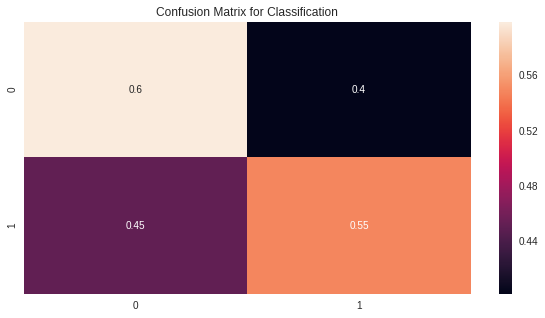

In [368]:
import seaborn as sn
cmLR = confusion_matrix(y_test, pred_y_test)
cmLR = cmLR.astype('float') / cmLR.sum(axis=1)[:, np.newaxis]

df_cmLR = pd.DataFrame(cmLR)

plt.figure(figsize = (10,5))
plt.title("Confusion Matrix for Classification")
sn.heatmap(df_cmLR, annot=True)
plt.show()

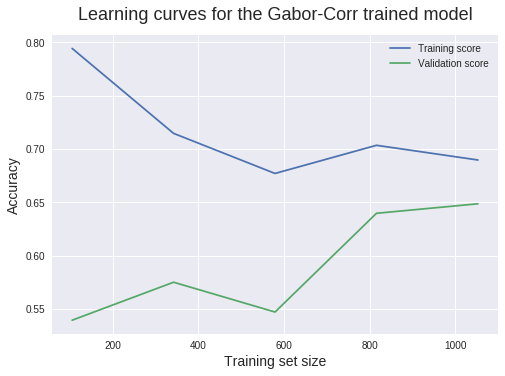

In [370]:
#Plot Loss Curves
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(estimator = nnet_Corr, X = x_train_corr, y = y_train, cv = 5, scoring = 'accuracy')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation score')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for the Gabor-Corr trained model', fontsize = 18, y = 1.03)
plt.legend()

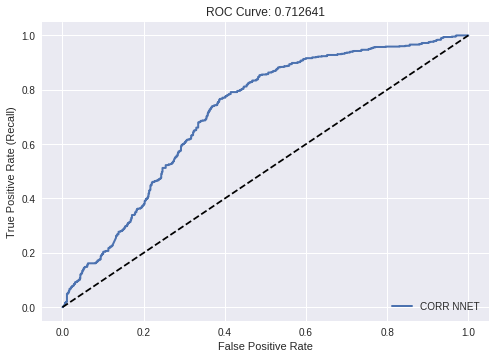

In [371]:
# Plot ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

y_train_prob_Corr = cross_val_predict(nnet_Corr, x_train_corr, y_train, cv = 10, method = "predict_proba")
y_train_scores_Corr = y_train_prob_Corr[:,1]
fpr, tpr, thresholds = roc_curve(y_train,y_train_scores_Corr)

# Area Under the Curve
roc_auc = roc_auc_score(y_train, y_train_scores_Corr)

def plot_roc_curve(fpr, tpr, label):
  plt.plot(fpr, tpr, linewidth = 2, label = label)
  plt.plot([0,1], [0,1], 'k--') #Dashed Diagonal
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate (Recall)")
  plt.title("ROC Curve: %f" % roc_auc)

plot_roc_curve(fpr, tpr, "CORR NNET")
plt.legend(loc = "lower right")
plt.show()